In [27]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

In [93]:
sentences = [
    ["AGTCGATCGA", "AGTAGAGAC", 'GTAGAGACA'],
    ["AGTCGATCGA", "AGTAGAGAC", 'GTA']
]

In [94]:
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

In [95]:
vector = model.wv["AGTAGAGAC"]

In [96]:
print(vector)

[-5.3622725e-04  2.3643136e-04  5.1033497e-03  9.0092728e-03
 -9.3029495e-03 -7.1168090e-03  6.4588725e-03  8.9729885e-03
 -5.0154282e-03 -3.7633716e-03  7.3805046e-03 -1.5334714e-03
 -4.5366134e-03  6.5540518e-03 -4.8601604e-03 -1.8160177e-03
  2.8765798e-03  9.9187379e-04 -8.2852151e-03 -9.4488179e-03
  7.3117660e-03  5.0702621e-03  6.7576934e-03  7.6286553e-04
  6.3508903e-03 -3.4053659e-03 -9.4640139e-04  5.7685734e-03
 -7.5216377e-03 -3.9361035e-03 -7.5115822e-03 -9.3004224e-04
  9.5381187e-03 -7.3191668e-03 -2.3337686e-03 -1.9377411e-03
  8.0774371e-03 -5.9308959e-03  4.5162440e-05 -4.7537340e-03
 -9.6035507e-03  5.0072931e-03 -8.7595852e-03 -4.3918253e-03
 -3.5099984e-05 -2.9618145e-04 -7.6612402e-03  9.6147433e-03
  4.9820580e-03  9.2331432e-03 -8.1579173e-03  4.4957981e-03
 -4.1370760e-03  8.2453608e-04  8.4986202e-03 -4.4621765e-03
  4.5175003e-03 -6.7869602e-03 -3.5484887e-03  9.3985079e-03
 -1.5776526e-03  3.2137157e-04 -4.1406299e-03 -7.6826881e-03
 -1.5080082e-03  2.46979

In [90]:
similar_words = model.wv.most_similar('AGTAGAGAC')
print(similar_words)

[('AGTCGATCGA', -0.01083916611969471), ('GTA', -0.05234673246741295), ('GTAGAGACA', -0.111670583486557)]


In [91]:
model.save("word2vec.model")  # Save
model = Word2Vec.load("word2vec.model")

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


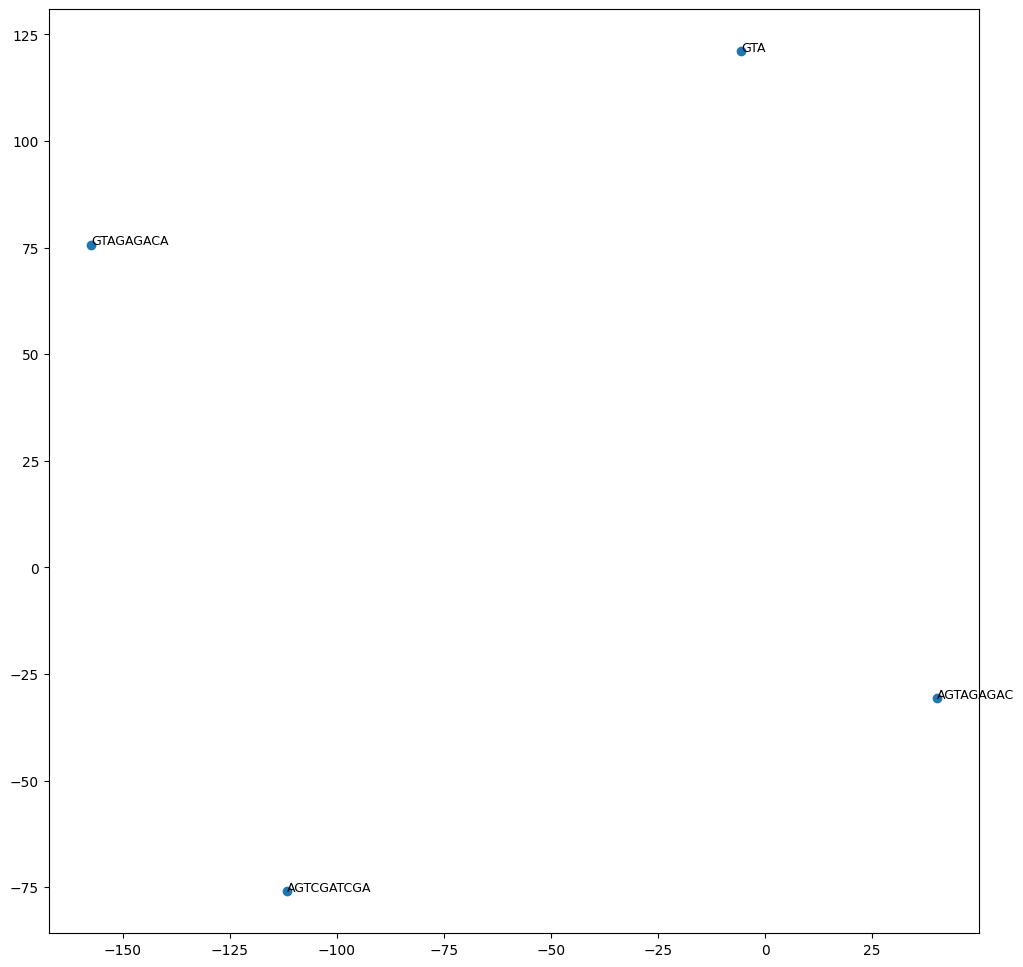

In [92]:
# Reduce dimensions
word_vectors = model.wv
words = list(word_vectors.key_to_index)[:100]  # Use at least 50-100 words
X = np.array([word_vectors[word] for word in words])

# TSNE
perplexity = min(30, len(words) - 1)  # Ensure perplexity is valid
tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity, n_iter=3000)
X_tsne = tsne.fit_transform(X)

# Plot
plt.figure(figsize=(12, 12))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])

# Annotate
for i, word in enumerate(words):  # Annotate all points in `words`
    plt.annotate(word, (X_tsne[i, 0], X_tsne[i, 1]), fontsize=9)

plt.show()